# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [11]:
import numpy as np

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform

x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

/Users/Vivian/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[2.0042484  2.01562239 2.47957037 2.63410762 2.55022969 2.33295893
 2.15034517 2.90267533 2.80429191 2.47990511]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

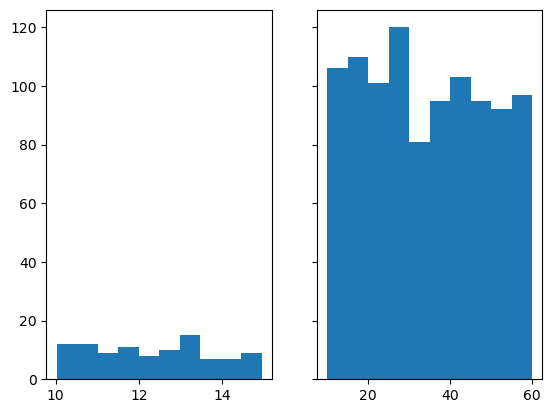

In [2]:
import matplotlib.pyplot as plt

def unif_rand_numb(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    rand_numbers = (ceiling-bottom)*x + bottom
    return rand_numbers

Params1 = unif_rand_numb(10, 15, 100)
Params2 = unif_rand_numb(10, 60, 1000)

fig, (chart1, chart2) = plt.subplots(ncols=2, nrows=1, sharey=True)
chart1.hist(Params1, bins=10)
chart2.hist(Params2, bins=10)
plt.show()

How are the two distributions different?

In [ ]:
# the "size" of the right chart is considerabily bigger, due to the fact that the count is ten times higher. also, the range in the x axis is bigger because the 
# difference between the bottom and the ceiling is bigger as well

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [ ]:
import numpy as np

def normally_rand_numb (count, avg, std):
    x = np.random.randn(count)
    rand_numb = avg + std * x
    return rand_numb


Params3 = normally_rand_numb(1000, 10, 1)
Params4 = normally_rand_numb(1000, 10, 50)

fig, (chart3, chart4) = plt.subplots(1,2, sharey=True)
chart3.hist(Params3, bins=10)
chart4.hist(Params4, bins=10)
plt.show()

How are the two distributions different?

In [ ]:
# the one with bigger standard deviation has, naturally, the numbers more spread. Although at a first look the shape seems simmilar, the range of the x axis in the second graph
# is quite bigger, so in a simmilar scale the right one would have more flatten bars

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [5]:
import pandas as pd
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


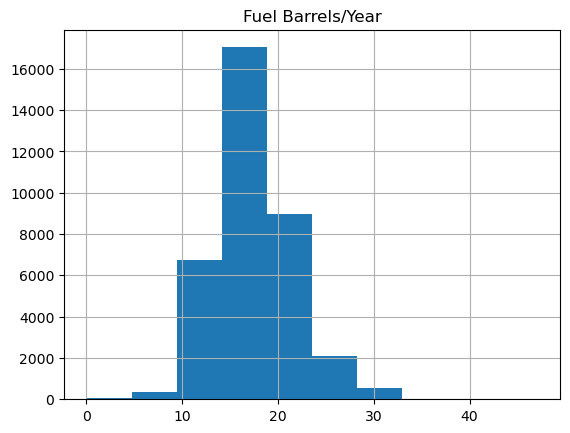

In [6]:
vehicles.hist(["Fuel Barrels/Year"])
plt.show()

2. CO2 Emission Grams/Mile 

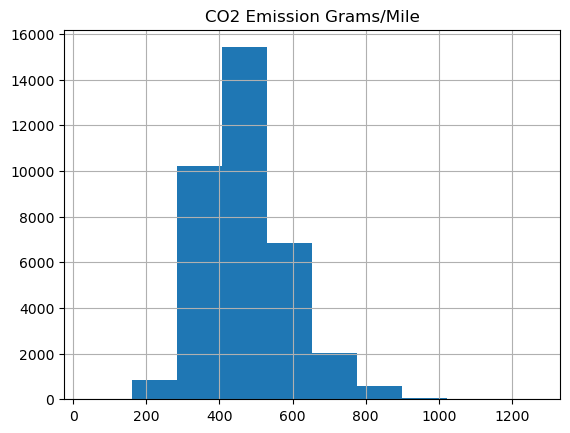

In [7]:
vehicles.hist(["CO2 Emission Grams/Mile"])
plt.show()

3. Combined MPG

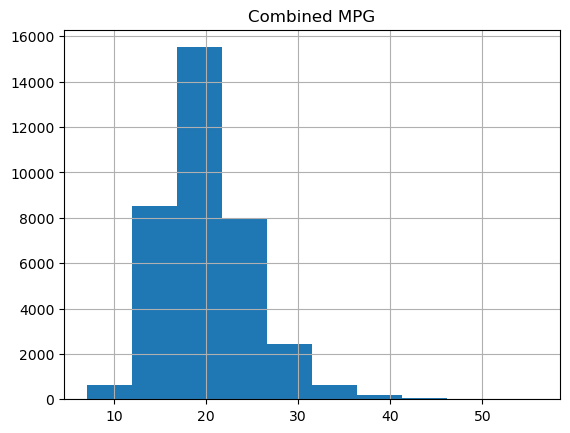

In [8]:
vehicles.hist(["Combined MPG"])
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [9]:
meanfb_y = vehicles[["Fuel Barrels/Year"]].mean()
medianfb_y = vehicles[["Fuel Barrels/Year"]].median()

mean_co2_mile = vehicles[["CO2 Emission Grams/Mile"]].mean()
median_co2_mile = vehicles[["CO2 Emission Grams/Mile"]].median()

mean_mpg = vehicles[["Combined MPG"]].mean()
median_mpg = vehicles[["Combined MPG"]].median()

normal_dist = [abs(medianfb_y-meanfb_y), abs(median_co2_mile-mean_co2_mile), abs(median_mpg-mean_mpg)]
normal_dist

# Fuel Barrels are the most normally distributed once it's the variable where the difference between the median and the mean is smaller

[Fuel Barrels/Year    0.261161
 dtype: float64,
 CO2 Emission Grams/Mile    7.579497
 dtype: float64,
 Combined MPG    0.929322
 dtype: float64]

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

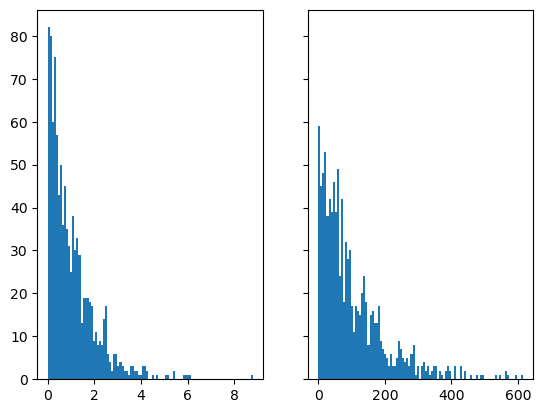

In [12]:
from scipy.stats import expon

def expon_distr(avg, count):
    return np.random.exponential(avg, count)

Params5 = expon_distr(1, 1000)
Params6 = expon_distr(100, 1000)

fig, (chart5, chart6) = plt.subplots(1,2, sharey=True)
chart5.hist(Params5, bins=100)
chart6.hist(Params6, bins=100)
plt.show()

How are the two distributions different?

In [ ]:
# although both graphs have similar shape, the one with the smaller mean has a lot more values near 0, and less narrow distribution

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [13]:
mean = 10
expon_dist= expon(scale=mean)
expon_dist.cdf(14)

0.7534030360583935

What is the probability that the customer will spend more than 15 minutes

In [15]:
1 - expon_dist.cdf(14)

0.24659696394160646